# Hotel Booking Cancellation Customer Segmentation

## Introduction

Booking cancellation is one of the factors affecting hotel revenue management forecast. In order to reduce hotel booking cancellations, we explore customer segmentation of our guests at resort hotel H1. This allows us to understand the customer segmentation that has the highest cancellation rate. We then can design hotel products and services to better serve our customers and to reduce hotel booking cancellation which in turn will allow us to improve our hotel revenue management forecast.

The dataset used in this project is obtained from “Hotel Booking Demand Datasets” (Antonio et al., 2019) which is obtained from https://www.sciencedirect.com/science/article/pii/S2352340918315191.
It is a Resort hotel dataset in Portugal.

## Exploratory Data Analysis (EDA)

In [34]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

import pickle as pkl

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from kmodes.kmodes import KModes

# show all columns in the dataframe
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis (EDA)

In [47]:
# import the data
data = pd.read_csv('data/H1.csv')
country_df = pd.read_csv('data/Country & Continent.csv')

In [48]:
df = data.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [49]:
# strip all the white spaces from the column values
for column in df.columns:
    if df[column].dtypes=='object':
        df[column] = df[column].str.strip()

In [50]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.61977
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.00000


In [51]:
# feature engineering
# feature engineered columns with similar meanings

# rename "Undefined" as "SC" as they have the same meaning
df['Meal'].replace('Undefined', 'SC', inplace=True)

# drop "Distribution Channel" as it has the same meaning as "Market Segment"
df.drop('DistributionChannel', axis=1, inplace=True)

# use "Arrival Date Month" as the attribute to check the seasonality factor of the booking reservation
df.drop(['ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth'], axis=1, inplace=True)

# drop "Agent" as it has the same meaning as "Company"
df.drop('Agent', axis=1, inplace=True)

# drop "Reservation Status" and "Reservation Status Date" as they are not used
df.drop(['ReservationStatus', 'ReservationStatusDate'], axis=1, inplace=True)

# recoded customers' number of kids to binary: 0: does not have kids and 1: have kids
df['HaveKids'] = np.where(df['Children']>0, 1, 0)

# count the total number of guests instead of count them separately
df['TotalGuests'] = df['Adults'] + df['Children'] + df['Babies']
df.drop(['Adults', 'Children', 'Babies'], axis=1, inplace=True)

# there was negative and 0 value for "ADR" which does not make sense
# impute the negative ADR value to 0
df['ADR'] = np.where(df['ADR']<0, 0, df['ADR'])

# it is impossible for booking to have 0 guests
# drop the booking with 0 guests
df = df[df['TotalGuests']!=0]

# change the "Company" column to binary to indicate if the booking is made by company or personal
df['IsCompany'] = np.where(df['Company']=='NULL', 0, 1)
df.drop('Company', axis=1, inplace=True)

# no deposit and refundable have the same meaning
# categorize both no deposit and refundable to be the same
df['DepositType'] = np.where(df['DepositType']=='No Deposit', 'Refundable', df['DepositType'])

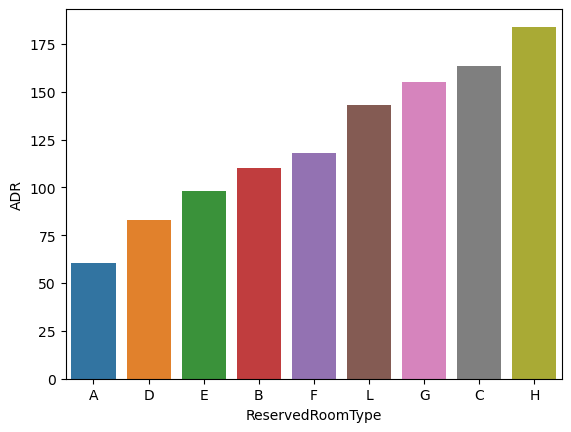

In [52]:
# check the room price based on different room type
room_price = df.groupby('ReservedRoomType')['ADR'].median().reset_index().sort_values('ADR')

# it looks like room H is the most expensive and room A is the cheapest 
sns.barplot(room_price, x='ReservedRoomType', y='ADR')
plt.savefig(r'plot/ReservedRoomType.jpeg')

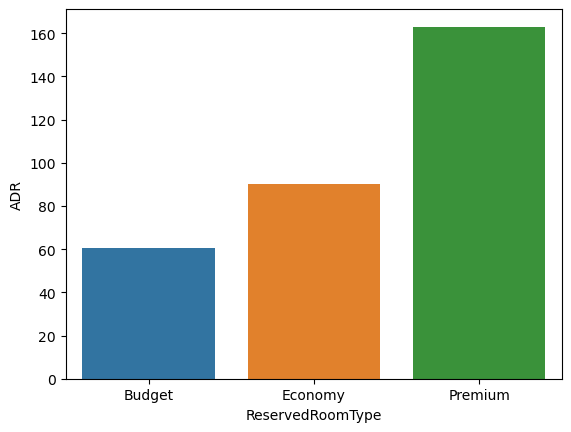

In [53]:
# there are 10 category of rooms, there is too many category
# let's narrow the rooms into 3 categories: budget, economy and premium
# categorize A and P to budget as the median cost is much lower
# categorize D, E, B and F together as economy as there is big jump of price to room L
# categorize the remaining room G, C and H to premium
# edit for assigned room type as well
df['ReservedRoomType'] = np.where(df['ReservedRoomType'].isin(['A', 'P']), 'Budget',
                         np.where(df['ReservedRoomType'].isin(['D', 'E', 'B', 'F']), 'Economy', 'Premium'))

room_price = df.groupby('ReservedRoomType')['ADR'].median().reset_index().sort_values('ADR')

# most customers book a premium room for the resort hotel 
sns.barplot(room_price, x='ReservedRoomType', y='ADR')
plt.savefig(r'plot/RoomPrice.jpeg')

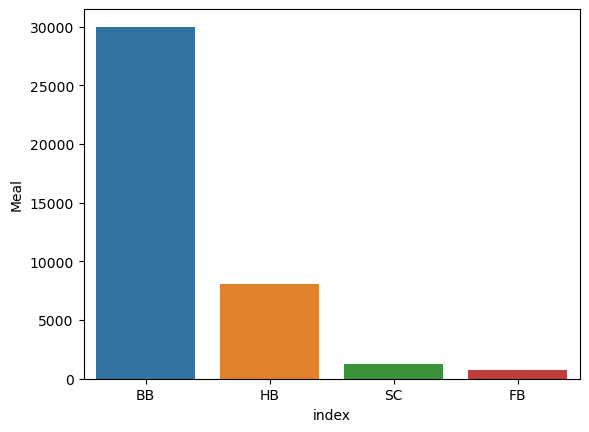

In [54]:
# most customers have opted for booking with "BB (Breakfast and Bed)"
meals = df['Meal'].value_counts().reset_index()

sns.barplot(meals, x='index', y='Meal')
plt.savefig(r'plot/Meal.jpeg')

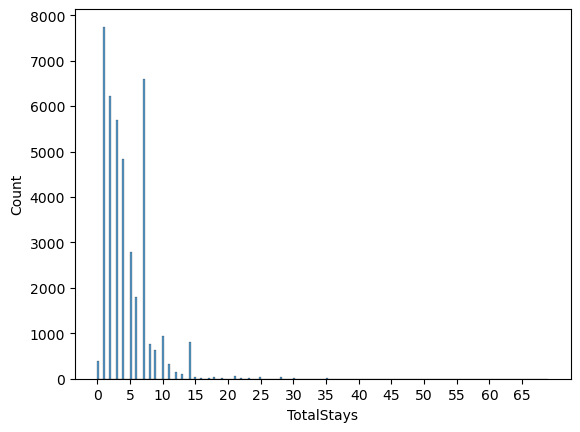

In [55]:
# combine totay stay duration rather than separate the stays in weekdays and weekends
df['TotalStays'] = df['StaysInWeekNights'] + df['StaysInWeekendNights']
df.drop(['StaysInWeekNights', 'StaysInWeekendNights'], axis=1, inplace=True)
sns.histplot(df['TotalStays']).set_xticks([x for x in range(0, 70, 5)])
plt.savefig(r'plot/TotalStayDistribution.jpeg')
plt.show()

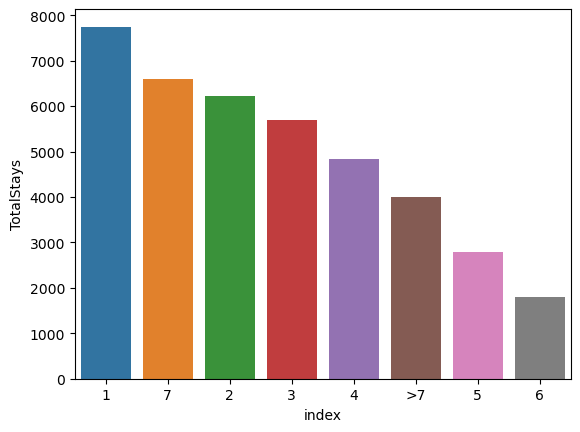

In [56]:
# Most customers have short stay (<7 days) and few 0 days (which is probably for event booking).
# Drop the 0 days and categorized the stay into 1, 2, 3, 4, 5, 6, 7 and >7 days.
df = df[df['TotalStays']!=0]
df['TotalStays'] = np.where(df['TotalStays']>7, ">7", df['TotalStays'])

# most customers stay for 1 day follows by 7 days stay
total_stays = df['TotalStays'].value_counts().reset_index()
sns.barplot(total_stays, x='index', y='TotalStays')
plt.savefig(r'plot/TotalStay.jpeg')

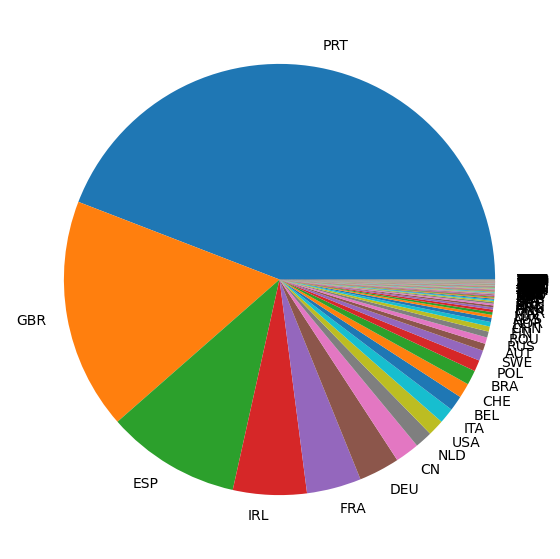

In [57]:
# see the country distribution of the customers
countries = df['Country'].value_counts().reset_index()

fig = plt.figure(figsize =(10, 7))
plt.pie(countries['Country'], labels = countries['index'])
plt.savefig(r'plot/CountryDistribution.jpeg')
plt.show()

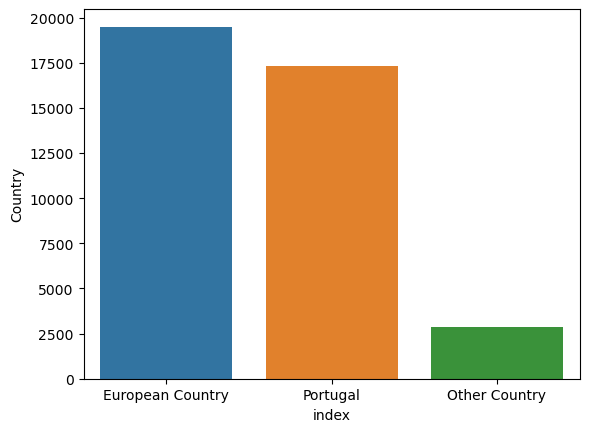

In [58]:
# majority of the countries are Portugal followed by European countries and others. Thus, categorize them into Portugal, European and Other Country.
df = pd.merge(df, country_df[['3-Letter (alpha 3 code)', 'Continent']], how='left', left_on='Country', right_on='3-Letter (alpha 3 code)')
df.drop('3-Letter (alpha 3 code)', axis=1, inplace=True)

df['Country Recode'] = np.where(df['Continent']=='Europe', 'European Country', 'Other Country')
df['Country Recode'] = np.where(df['Country']=='PRT', 'Portugal', df['Country Recode'])
df.drop(['Country', 'Continent'], axis=1, inplace=True)
df.rename(columns={'Country Recode' : 'Country'}, inplace=True)  

# most customers come from european countries
countries_bar = df['Country'].value_counts().reset_index()
sns.barplot(countries_bar, x='index', y='Country')
plt.savefig(r'plot/RecodeCountryDistribution.jpeg')

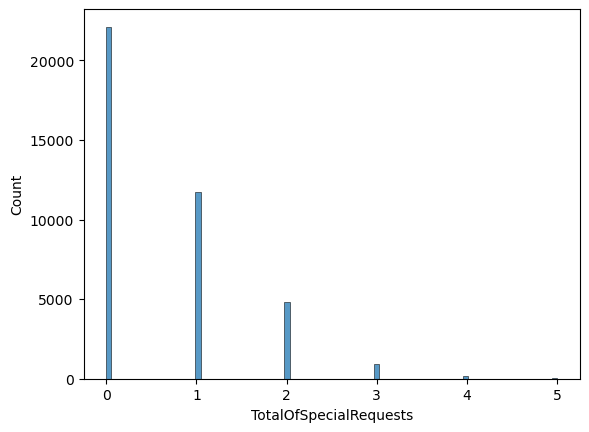

In [59]:
# customers special requsts
sns.histplot(df['TotalOfSpecialRequests'])
plt.savefig(r'plot/SpecialRequestsDistribution.jpeg')

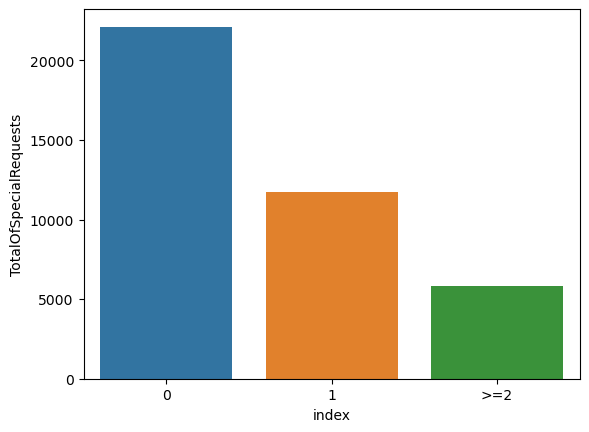

In [60]:
# most customers do not have special requests follow by 1 and 2 and above
# bin the number of special requests into 0, 1 and more than 2
df['TotalOfSpecialRequests'] = np.where(df['TotalOfSpecialRequests']>=2, ">=2", df['TotalOfSpecialRequests'])

special_request = df['TotalOfSpecialRequests'].value_counts().reset_index()
sns.barplot(special_request, x='index', y='TotalOfSpecialRequests')
plt.savefig(r'plot/SpecialRequests.jpeg')

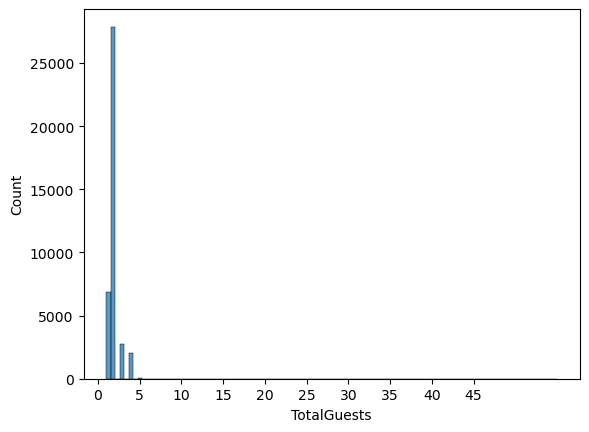

In [61]:
# check the total guests distribution
sns.histplot(df['TotalGuests'], bins=100).set_xticks([x for x in range(0, 50, 5)])
plt.savefig(r'plot/TotalGuestsDistribution.jpeg')
plt.show()

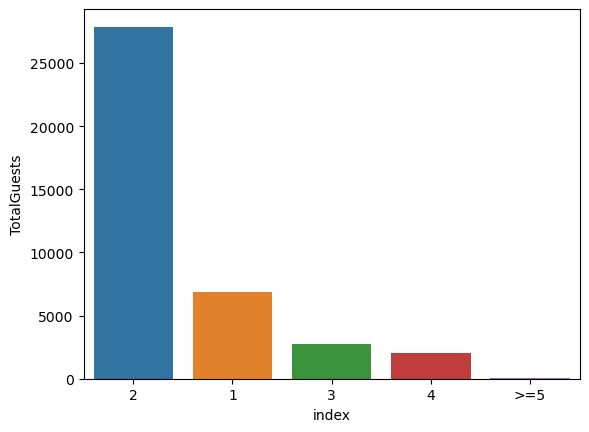

In [62]:
# there are very few people which comes with number of 5 and above
# let's group these customer as >=5
df['TotalGuests'] = np.where(df['TotalGuests']>=5, ">=5", df['TotalGuests'])

# most bookings have 2 guests
number_of_guests = df['TotalGuests'].value_counts().reset_index()
sns.barplot(number_of_guests, x='index', y='TotalGuests')
plt.savefig(r'plot/TotalGuests.jpeg')

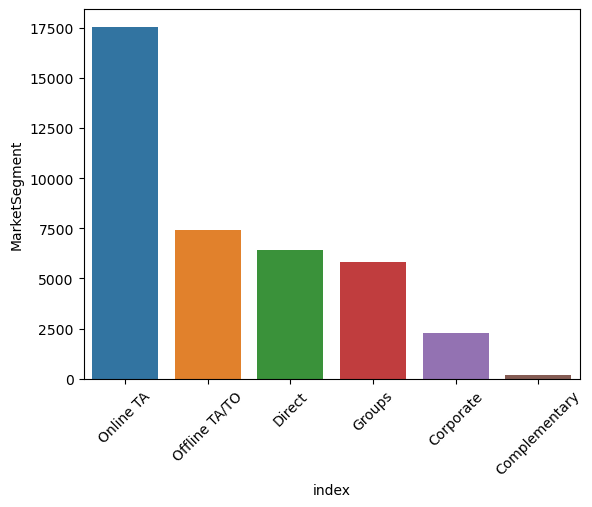

In [63]:
# most bookings made are online 
market_segment = df['MarketSegment'].value_counts().reset_index()
sns.barplot(market_segment, x='index', y='MarketSegment')
plt.xticks(rotation=45)
plt.savefig(r'plot/MarketSegments.jpeg')
plt.show()

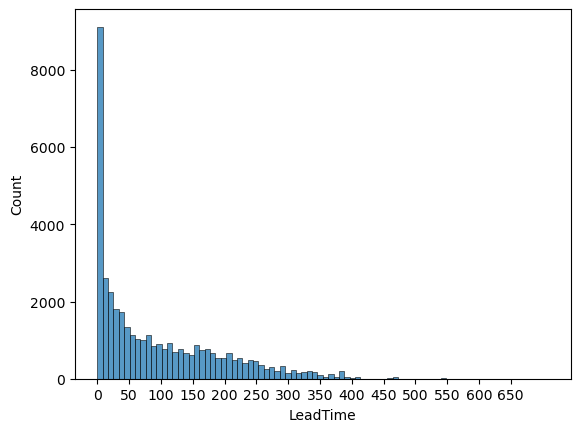

In [64]:
# most bookings were made within 1 month before the actual stay
sns.histplot(df['LeadTime']).set_xticks([x for x in range(0, 700, 50)])
plt.savefig(r'plot/LeadTimeDistributions.jpeg')
plt.show()

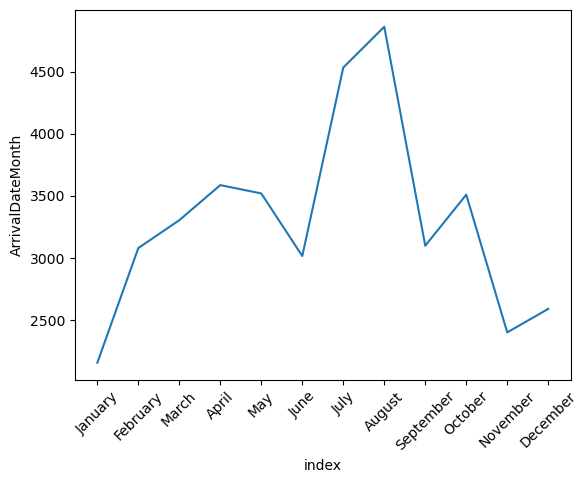

In [65]:
# August is the busiest month follows by July
month_map = {'January' : 1,
             'February' : 2,
             'March' : 3,
             'April' : 4,
             'May' : 5,
             'June' : 6,
             'July' : 7,
             'August' : 8,
             'September' : 9,
             'October' : 10,
             'November' : 11,
             'December' : 12
            }

arrival_month = df['ArrivalDateMonth'].value_counts().reset_index()
arrival_month['Month'] = arrival_month['index'].map(month_map)
arrival_month.sort_values('Month', inplace=True)
arrival_month.drop('Month', axis=1, inplace=True)
sns.lineplot(arrival_month, x='index', y='ArrivalDateMonth')
plt.xticks(rotation=45)
plt.savefig(r'plot/ArrivalDateMonth.jpeg')
plt.show()

### Clustering

In [68]:
# as majority of the features are categorical and 1 numerical (lead time)
# make it categorical by cutting it into 4 quartiles
df['LeadTimeRecode'], cut_bin = pd.qcut(df['LeadTime'], q = 4, retbins = True)

# features used in the bookings
cat_features = ['ArrivalDateMonth', 'TotalStays', 'TotalGuests', 'Meal', 'Country', 'MarketSegment', 'ReservedRoomType', 'CustomerType', 'TotalOfSpecialRequests', 'LeadTimeRecode']
binary_features = ['HaveKids', 'IsRepeatedGuest', 'BookingChanges', 'IsCompany', 'IsCanceled']

df_cat = pd.get_dummies(df[cat_features])
df_bin = df[binary_features]

X = pd.concat([df_cat, df_bin], axis=1)

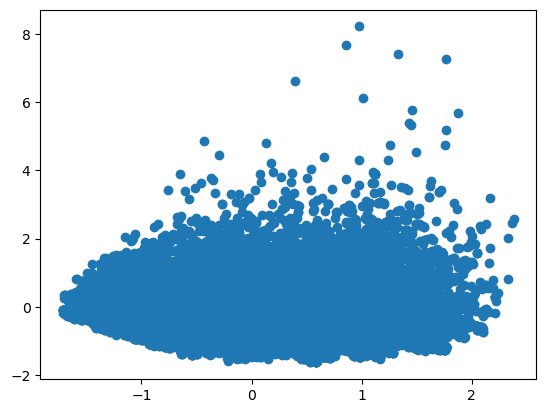

In [69]:
# use pca tp decompose the features into two-dimensional for data visualisation
pca = PCA(2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pd.DataFrame(pca.transform(X_centered))

# plotting the result of pca
plt.scatter(X_pca[0], X_pca[1])

In [ ]:
# K-modes algorithm is used in this project as all feature columns are categorical
# elbow curve to find optimal K
cost = []
K = range(1, 10)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters


In [74]:
# save the kmodes cost pickle
with open(r'pickle/kmodes_cost.pkl', 'wb') as f:  # open a text file
    pkl.dump(cost, f) # serialize the list

In [23]:
# save the kmodes cost pickle
with open(r'pickle/kmodes_cost.pkl', 'rb') as f:  # open a text file
    cost = pkl.load(f) # serialize the list

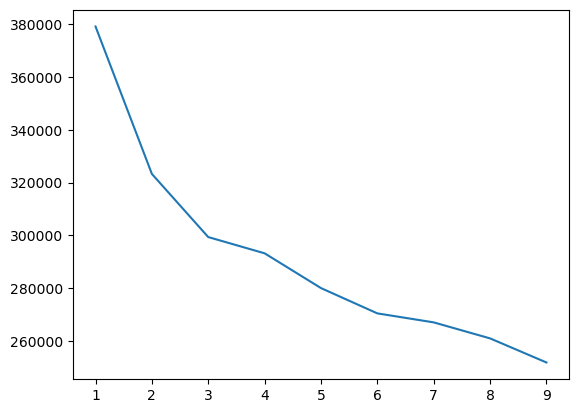

In [24]:
# based on elbow method, the optimal no of cluster is 3
plt.plot([i for i in range(1, 10)], cost)
plt.savefig(r'plot/ElbowMethod.jpeg')

In [31]:
# building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
labels = kmode.fit_predict(X)
labels

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9706, cost: 317827.0
Run 1, iteration: 2/100, moves: 5358, cost: 311869.0
Run 1, iteration: 3/100, moves: 8308, cost: 305435.0
Run 1, iteration: 4/100, moves: 6920, cost: 300279.0
Run 1, iteration: 5/100, moves: 2186, cost: 300279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13218, cost: 300279.0
Run 2, iteration: 2/100, moves: 884, cost: 300279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9565, cost: 296674.0
Run 3, iteration: 2/100, moves: 97, cost: 296674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12589, cost: 300597.0
Run 4, iteration: 2/100, moves: 2193, cost: 300597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 

array([2, 2, 0, ..., 0, 0, 1], dtype=uint16)

In [34]:
# save the kmodes predicted labels
with open(r'pickle/kmodes_labels.pkl', 'wb') as f:  # open a text file
    pkl.dump(labels, f) # serialize the list

In [70]:
# save the kmodes cost pickle
with open(r'pickle/kmodes_labels.pkl', 'rb') as f:  # open a text file
    labels = pkl.load(f) # serialize the list

In [71]:
X['labels'] = labels
X.groupby('labels')[X.columns[:-1]].mean()

,ArrivalDateMonth_April,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,ArrivalDateMonth_November,ArrivalDateMonth_October,ArrivalDateMonth_September,TotalStays_1,TotalStays_2,TotalStays_3,TotalStays_4,TotalStays_5,TotalStays_6,TotalStays_7,TotalStays_>7,TotalGuests_1,TotalGuests_2,TotalGuests_3,TotalGuests_4,TotalGuests_>=5,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Country_European Country,Country_Other Country,Country_Portugal,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Offline TA/TO,MarketSegment_Online TA,ReservedRoomType_Budget,ReservedRoomType_Economy,ReservedRoomType_Premium,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,TotalOfSpecialRequests_0,TotalOfSpecialRequests_1,TotalOfSpecialRequests_>=2,"LeadTimeRecode_(-0.001, 11.0]","LeadTimeRecode_(11.0, 58.0]","LeadTimeRecode_(58.0, 155.0]","LeadTimeRecode_(155.0, 709.0]",HaveKids,IsRepeatedGuest,BookingChanges,IsCompany,IsCanceled
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.085662,0.154843,0.058693,0.059019,0.046642,0.141880,0.092698,0.061755,0.097909,0.051918,0.074979,0.074002,0.124487,0.135431,0.136278,0.126441,0.090222,0.057390,0.194841,0.134910,0.064947,0.779558,0.080060,0.074718,0.000717,0.807700,0.004625,0.182985,0.004690,0.768745,0.082926,0.148329,0.002475,0.002736,0.122989,0.004104,0.167025,0.700671,0.268973,0.627777,0.103251,0.049638,0.005146,0.881702,0.063514,0.227933,0.548564,0.223503,0.190085,0.280894,0.299720,0.229301,0.117517,0.015764,0.263240,0.004039,0.225002
1,0.132717,0.051828,0.077407,0.068836,0.039641,0.047944,0.040579,0.117852,0.115040,0.053167,0.142226,0.112763,0.078746,0.169412,0.196866,0.153074,0.051962,0.035623,0.209321,0.104995,0.217892,0.723450,0.047944,0.010580,0.000134,0.426276,0.038570,0.414223,0.120932,0.710325,0.042186,0.247489,0.001473,0.036695,0.047007,0.591536,0.233695,0.089594,0.815990,0.158430,0.025579,0.104460,0.005491,0.124414,0.765635,0.861122,0.075398,0.063479,0.112629,0.211330,0.230883,0.445159,0.028793,0.014731,0.477166,0.165796,0.198473
2,0.076033,0.124406,0.066061,0.098587,0.068079,0.118471,0.076626,0.087666,0.068732,0.071759,0.076982,0.066595,0.311491,0.170525,0.126484,0.103395,0.060126,0.038580,0.121142,0.068257,0.254095,0.623575,0.070216,0.049323,0.002790,0.836301,0.023386,0.125000,0.015313,0.141679,0.075973,0.782348,0.009022,0.115978,0.248932,0.078585,0.183820,0.363663,0.766144,0.154796,0.079060,0.013355,0.009437,0.915954,0.061254,0.722934,0.161622,0.115444,0.385031,0.220026,0.215218,0.179725,0.085589,0.078051,0.224774,0.104107,0.366453


In [72]:
# compute the overall data mean and standard deviation
# after that, computes each cluster label data relative mean and standard deviation to overall data to understand each cluster label unique characteristic
X_mean = pd.concat([pd.DataFrame(X.mean().drop('labels'), columns=['mean']), 
                    X.groupby('labels').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'], 2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

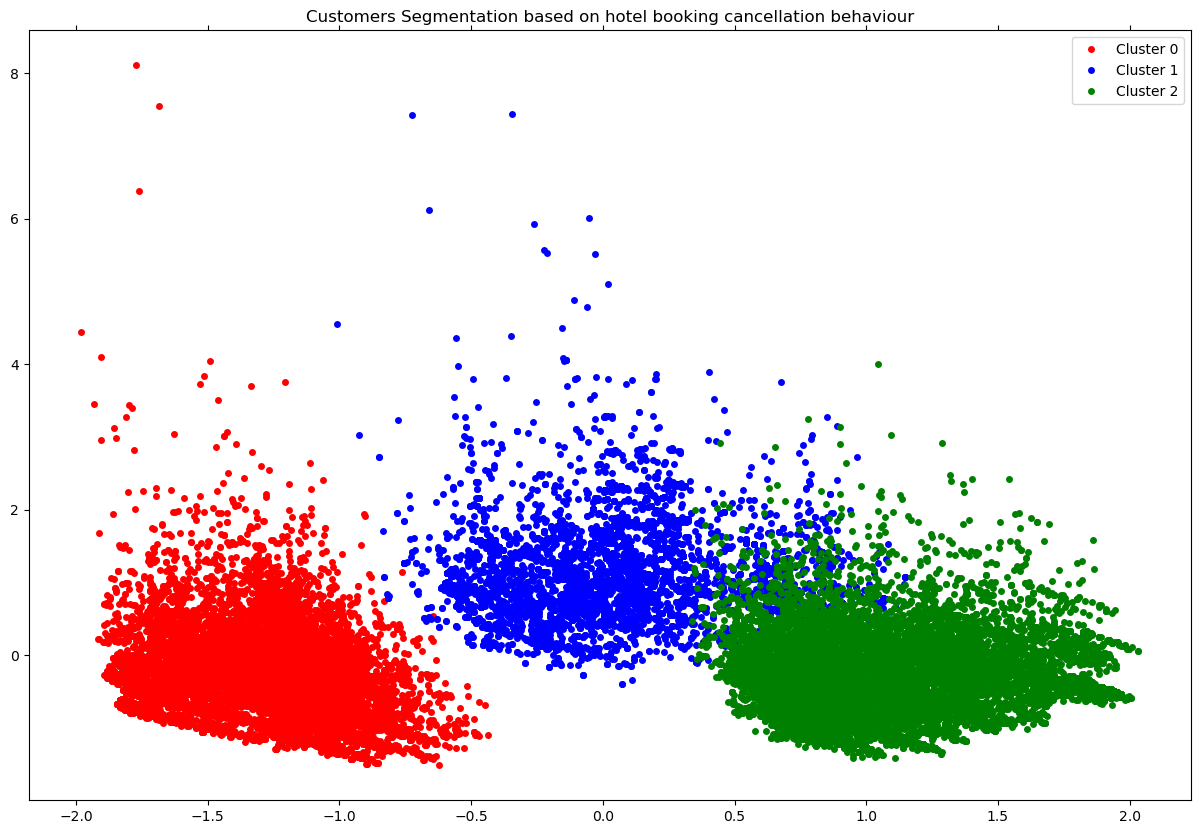

In [73]:
# visualisation of the clusters
pca = PCA(2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pd.DataFrame(pca.transform(X_centered))

colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2'}
  
plot_df = pd.DataFrame({'x': X_pca[0], 'y':X_pca[1], 'labels':X['labels']}) 
groups = plot_df.groupby('labels')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on hotel booking cancellation behaviour")
plt.savefig(r'plot/CustomerSegmentation.jpeg')
plt.show()

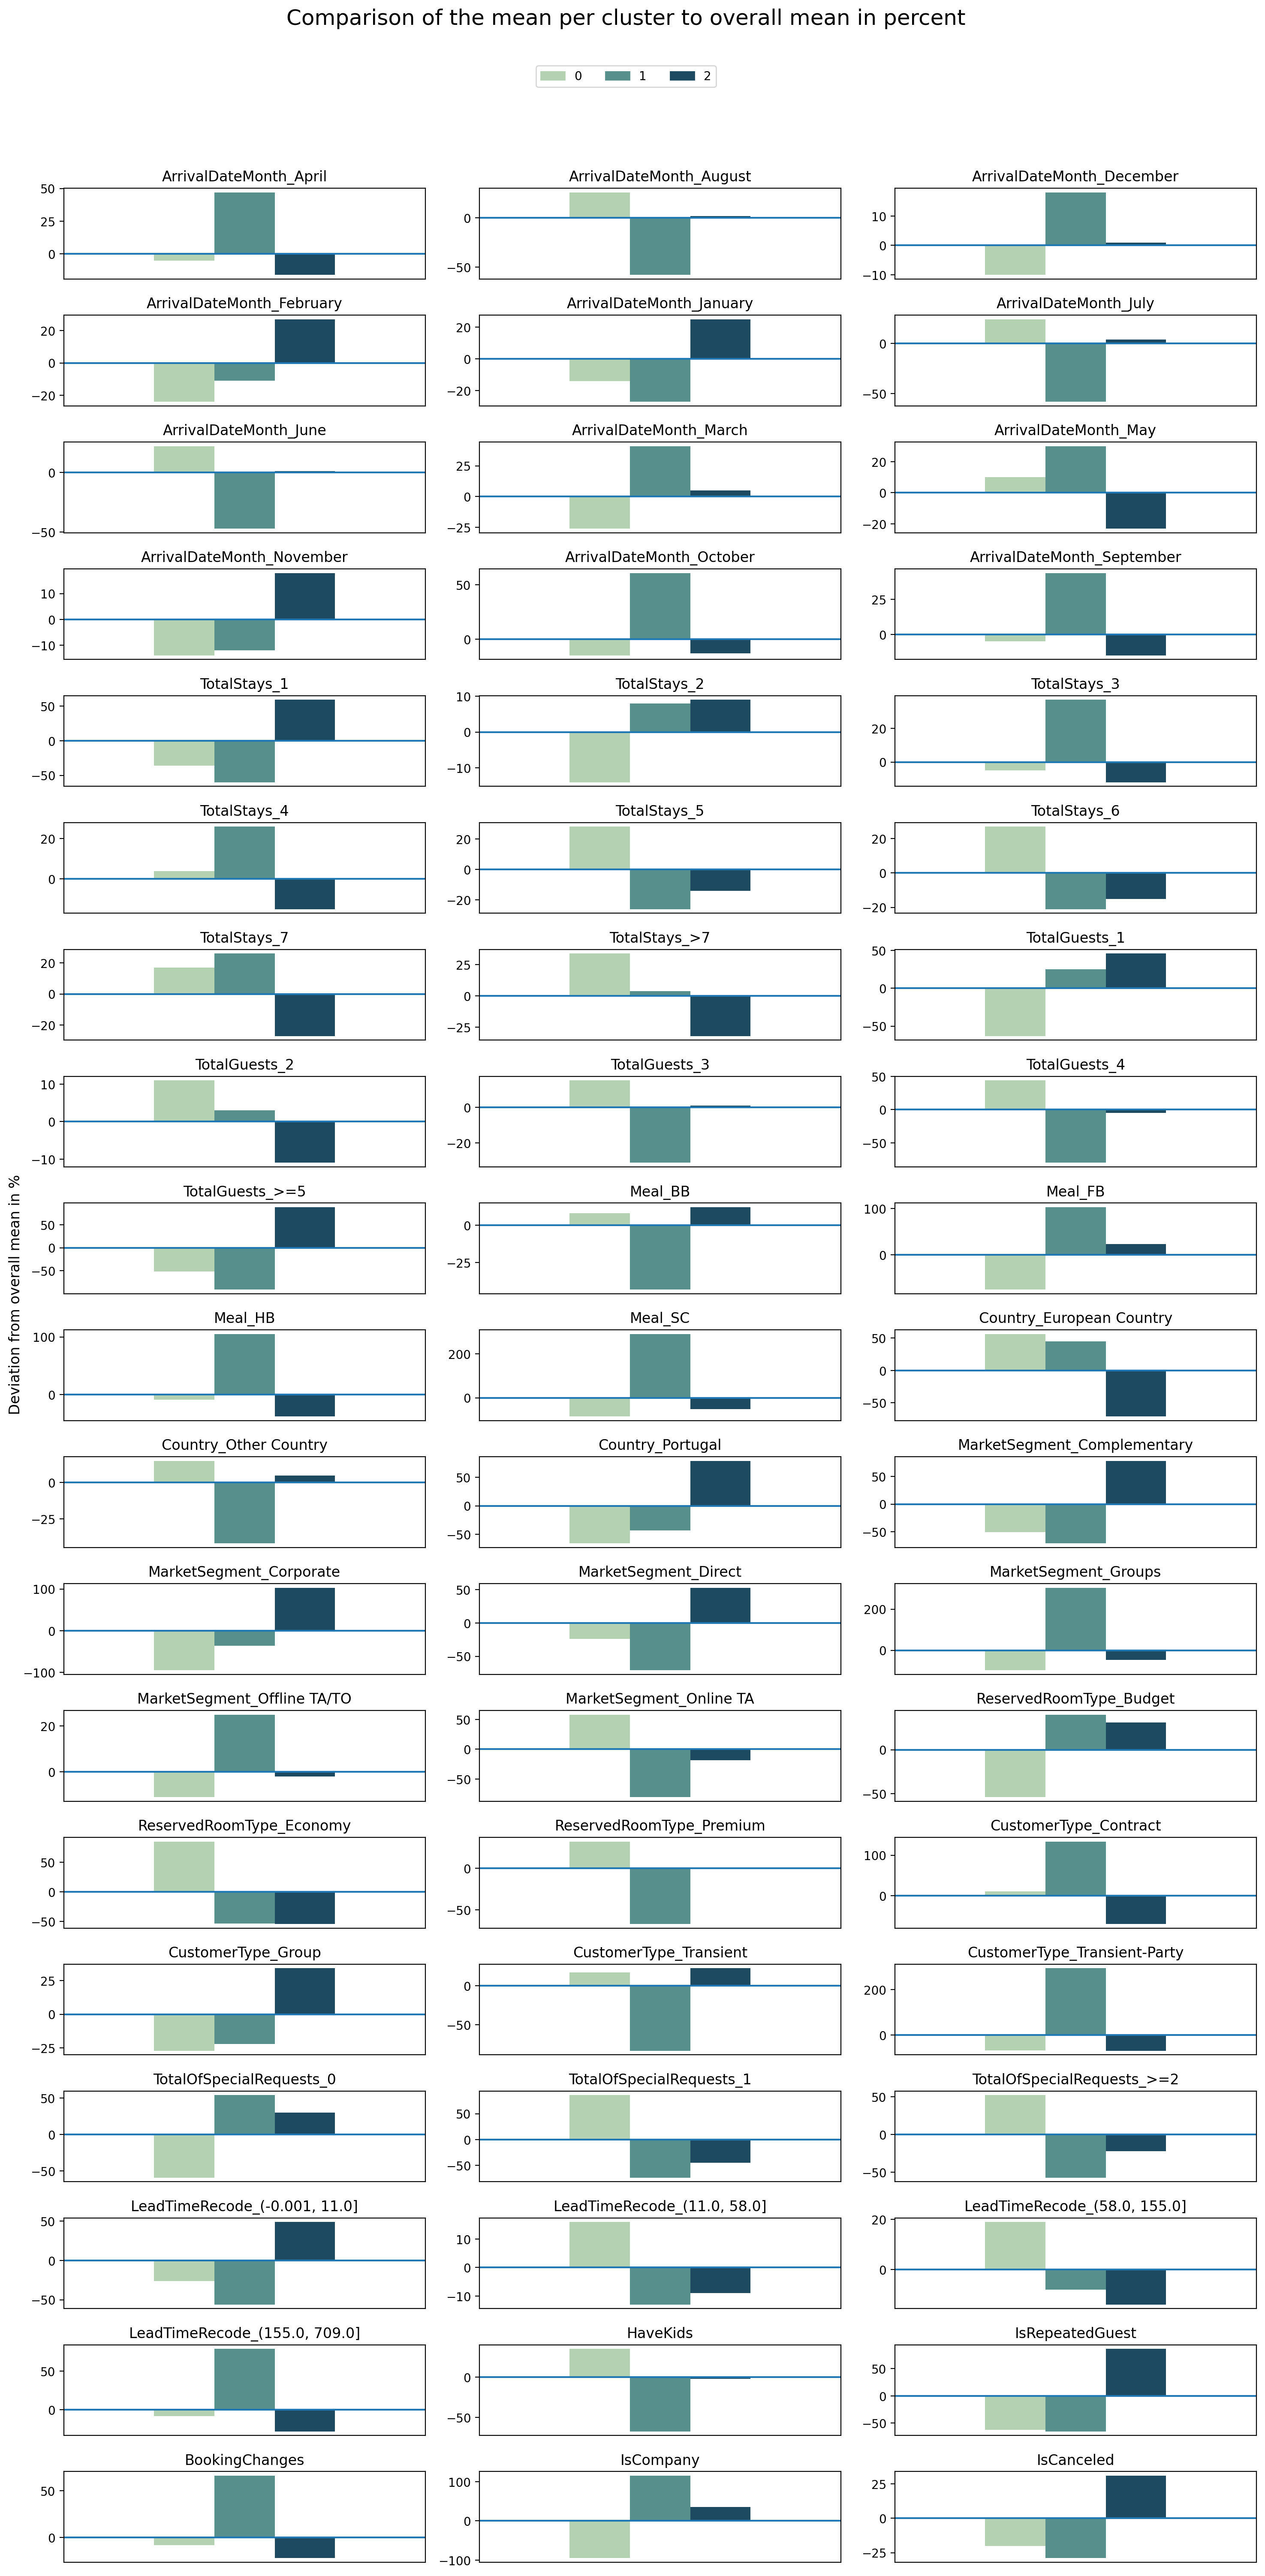

<Figure size 640x480 with 0 Axes>

In [75]:
# compare the characteristic of each labels to understand the cluster
def cluster_comparison_bar(X_comparison, colors, deviation=True, title="Cluster results"):
    features = X_comparison.index
    ncols = 3
    # calculate number of rows
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    # set figure size
    fig = plt.figure(figsize=(15, 30), dpi=200)
    #interate through every feature
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        X_comparison[X_comparison.index==feature].plot(kind='bar', ax=ax, title=feature, 
                                                       color=colors[0:len(X_comparison.columns)],
                                                       legend=False
                                                      )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = X_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:len(X_comparison.columns)],
                                                                  X_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()
    
    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60']   

cluster_comparison_bar(X_comparison=X_dev_rel, colors=cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")
plt.savefig(r'plot/CustomerSegmentationCharacteristics.jpeg')

## Insights and Findings

Based on the relative characteristics of each cluster, these are the following key characteristic of each cluster and its name.

Key characteristic for cluster label 0:
1. Have kids
2. Have mid booking lead time between 2-week to 2-month period
3. Make special requests
4. Reserve economy and premium room
5. Make online bookings
6. Have 2-4 guests
7. Have long stays
8. Travel during summer school holiday (majority arrive on June, July and August)
9. Interpreted customer group name: Personal (Family)

Key characteristic for cluster label 1:
1. Reserved by companies with a lot of booking changes
2. Have highest booking lead time between 6-month to 2-year period
3. Have contract with the hotel or transient party (the booking is associated to at least other transient booking)
4. Are group and travel operator market segments
5. Are from European countries
6. Orders meal
7. Travel all year round (majority arrive on March, April, May, September, October, December)
8. Interpreted customer group name: Group Tour

Key characteristic for cluster label 2:
1. Have the highest relative no of booking cancellations
2. Are repeated guests
3. Have lowest booking lead time less than 1-week period
4. Are group customers (the booking is associated to a group)
5. Are corporate, direct and complimentary customers
6. Are from Portugal
7. Have either 1 or more guests
8. Have short stay (1-day to 2-day)
9. Majority arrives on January, February and November
10. Interpreted customer group name: Corporate (Company)

## Product Design and Recommendations

From the data, Corporate customers have the highest no of booking cancellations.

To improve the hotel revenue forecast management, we can take the following strategy for the hotel to minimize the hotel booking cancellations:
1. Encourages the customers to make a special request like conducting special celebration, have unique feature like "Pick your guitar" and "DJ turntable" from Hard Rock Hotel Example, etc.
2. Establishes a contract with corporate customers like special deal/perks over a period of time
3. Offers deal for booking with high lead time (>= 2 weeks)

## Conclusion

In conclusion, this project used KMode clustering algorithm to segmentise the hotel booking cancellation customers into 3 segments: Personal (Family), Group Tour and Corporate (Company) segments to understand the characteristics of each customer segment to minimise the hotel booking cancellations.

After studying the customer segments for each hotel, product and service could be designed to lower the cancellation rate of the hotel to improve hotel revenue forecast management.